In [1]:
"""
Multi-Channel Speech Presence Probability
==============

----------


.. [1] M. Souden, J. Chen, J. Benesty and S. Affes, "Gaussian Model-Based Multichannel Speech Presence Probability,"
    in IEEE Transactions on Audio, Speech, and Language Processing, vol. 18, no. 5, pp. 1072-1077, July 2010,
    doi: 10.1109/TASL.2009.2035150.
   [2] Bagheri, S., Giacobello, D. (2019) Exploiting Multi-Channel Speech Presence Probability in Parametric
    Multi-Channel Wiener Filter. Proc. Interspeech 2019, 101-105, DOI: 10.21437/Interspeech.2019-2665
   [3] M. Souden, J. Chen, J. Benesty and S. Affes,"An Integrated Solution for Online Multichannel Noise Tracking and Reduction,"

"""

import os

import numpy as np
from pesq import pesq
from pystoi.stoi import stoi

import librosa
import matplotlib.pyplot as plt
from DistantSpeech.transform.transform import Transform
from DistantSpeech.beamformer.utils import pmesh, mesh, load_wav, save_audio, load_pcm
from DistantSpeech.beamformer.utils import load_audio as audioread
from DistantSpeech.beamformer.utils import save_audio as audiowrite
from DistantSpeech.beamformer.beamformer import beamformer
from DistantSpeech.beamformer.MicArray import MicArray, compute_tau
from DistantSpeech.noise_estimation import McSpp

In [2]:


sampling_frequency = 16000
fft_length = 512
fft_shift = 256
mic_diameter = 0.1
sound_speed = 343
look_direction = 30

signal = audioread("/home/wangwei/work/DistantSpeech/samples/audio_samples/5_541_20170608093550_4.wav")
# signal = audioread("/home/wangwei/work/DistantSpeech/samples/audio_samples/cleanspeech_aishell3.wav")
noise = audioread("/home/wangwei/work/DistantSpeech/samples/noise/office3.wav")
fs = 16000
M = 6
mic_array = MicArray(arrayType="circular", r=mic_diameter/2, M=M, n_fft=512)
mic_array_sim = mic_array.array_sim
# print(mic_array_sim.R)
# array_data, premix = mic_array_sim.generate_audio(signal, interference=noise, source_angle=look_direction, interf_angle=270, sir=0, snr=120)
# audiowrite('mix.wav', np.transpose(array_data))
# audiowrite('target.wav', np.transpose(premix[0, :, :]))
# audiowrite('interf.wav', np.transpose(premix[1, :, :]))
theoretical=True

premix = np.zeros((2, M, 318570))
array_data = audioread('/home/wangwei/work/DistantSpeech/example/mix.wav')
array_data = array_data.T
target = audioread('/home/wangwei/work/DistantSpeech/example/target.wav')
target = target.T
premix[0] = target
interf = audioread('/home/wangwei/work/DistantSpeech/example/interf.wav')
interf = interf.T
premix[1] = interf

print(array_data.shape)
M = array_data.shape[0]
transform = Transform(n_fft=512, hop_length=256, channel=M)
D = transform.stft(np.transpose(array_data))
transform = Transform(n_fft=512, hop_length=256, channel=M)
target = transform.stft(np.transpose(premix[0, :M, :]))
transform = Transform(n_fft=512, hop_length=256, channel=M)
Noise = transform.stft(np.transpose(premix[1, :M, :]))
print(Noise.shape)
half_bin = D.shape[0]
frame_num = D.shape[1]
print(D.shape)
# plt.figure(figsize=(14,8))
# plt.plot(mic_array_sim.room.rir[0][0])
# plt.show()

(6, 316761)
(257, 1244, 6)
(257, 1237, 6)


In [3]:
def power_to_db(x, amin=1e-3):
    db = 10.0 * np.log10(np.maximum(amin, x))

    return db
    

In [4]:
print(signal.shape)
# print(enh.shape)
# print(nsy.shape)

(316761,)


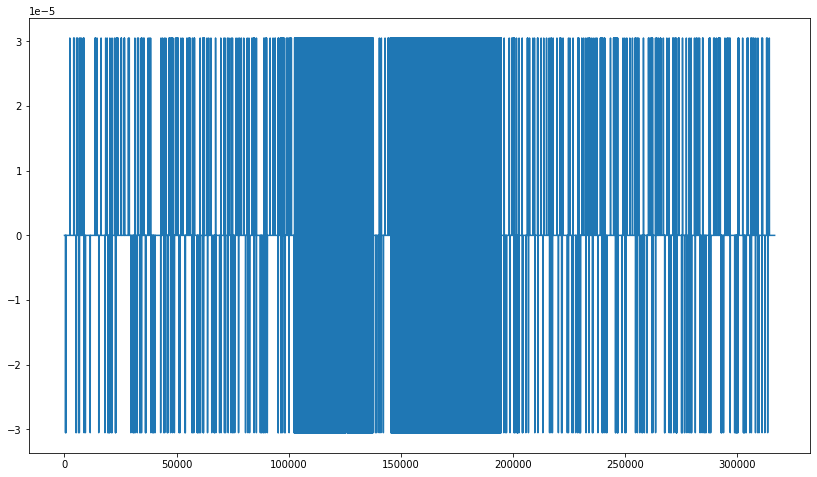

In [5]:
plt.figure(figsize=(14,8))
plt.plot(array_data[0, :] - premix[1, 0, :array_data.shape[1]] - premix[0, 0, :array_data.shape[1]])
plt.show()

In [6]:
# audiowrite('/home/wangwei/work/DistantSpeech/example/test_audio/sim/mix3/mix.wav', np.transpose(array_data))
# audiowrite('/home/wangwei/work/DistantSpeech/example/test_audio/sim/mix3/signal.wav', np.transpose(premix[0, :, :]))
# audiowrite('/home/wangwei/work/DistantSpeech/example/test_audio/sim/mix3/interf.wav', np.transpose(premix[1, :, :]))

(257, 1237, 6)


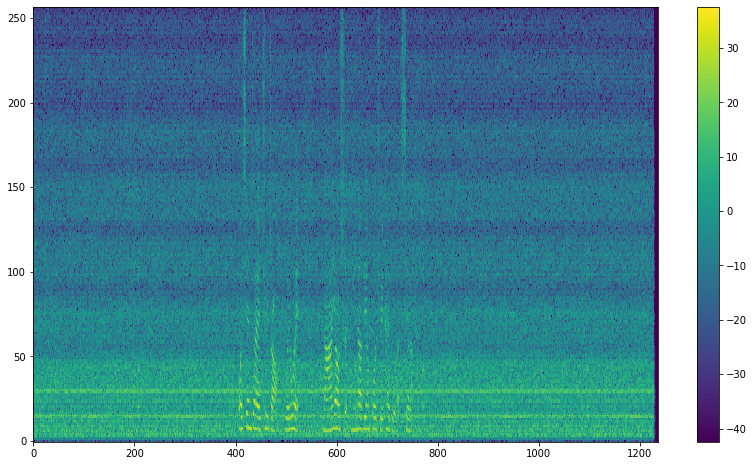

In [7]:

sr = 16000
r = 0.032
c = 343

frameLen = 256
hop = frameLen / 2
overlap = frameLen - hop
nfft = 256
c = 340
r = 0.032
fs = sr

# pampath = '/home/wangwei/work/DistantSpeech/samples/bookself/1'
# # pampath = '/home/wangwei/work/corpus/kws/lanso/record_test/meetingroom/20220106/pcm'
# array_data = load_pcm(pampath)

# filepath = "test_audio/rec1/"
# array_data, sr = load_wav(os.path.abspath(filepath))      # [channel,samples]

# wavpath = '/home/wangwei/work/Beamforming-for-speech-enhancement-master/sample_data'
# array_data, _ = load_wav(wavpath)
# array_data = array_data[:M, :]

# wavpath = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/rain/wav'
wavpath = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/meeting/1/wav'
# wavpath = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/rec1'
# wavpath = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/anechoic/wav'

# array_data, _ = load_wav(wavpath)
# array_data = array_data[:M, :]
# mic_array = MicArray(arrayType="circular", r=0.032, M=4, n_fft=512)
# theoretical = False
# M = array_data.shape[0]


transform = Transform(n_fft=512, hop_length=256, channel=M)
D = transform.stft(np.transpose(array_data))
# transform = Transform(n_fft=512, hop_length=256, channel=M)
# Noise = transform.stft(np.transpose(premix[1, ...]))

# # D = D[:, :790, :]
# # Noise = Noise[:, :790, :]
# print(Noise.shape)
Y, _ = transform.magphase(D, 2)
print(D.shape)
pmesh(librosa.power_to_db(Y[:, :, 0]))
# audiowrite('mix3.wav', np.transpose(array_data))
# audiowrite('target.wav', np.transpose(premix[0, :, :]))
# audiowrite('interf.wav', np.transpose(premix[1, :, :]))

In [8]:
channel = M
mcspp = McSpp(nfft=512, channels=channel, mic_array=mic_array)
mcspp.mcra.L = 15

p = np.zeros((half_bin, Y.shape[1]))
q = np.zeros((half_bin, Y.shape[1]))

Yout = np.zeros((Y.shape[0], Y.shape[1]), dtype=complex)
Yout1 = np.zeros((Y.shape[0], Y.shape[1]), dtype=complex)
w_n = np.zeros((half_bin, M), dtype=complex)

alpha_xx = mcspp.alpha
alpha_vv = mcspp.alpha
Phi_xx_th = np.zeros((half_bin, M, M), dtype=complex)
Phi_xx_all_th = np.zeros((half_bin, Y.shape[1]))
Phi_xx_all = np.zeros((half_bin, Y.shape[1]))
Phi_vv_th = np.zeros((half_bin, M, M), dtype=complex)
Phi_vv_inv_th_lemma = np.zeros((half_bin, M, M), dtype=complex)

xi_th = np.zeros((half_bin, Y.shape[1])) # theoretical
gamma_th = np.zeros((half_bin, Y.shape[1])) # theoretical
xi = np.zeros((half_bin, Y.shape[1])) # estimated
gamma_est = np.zeros((half_bin, Y.shape[1])) # estimated
xi_local_th = np.zeros((half_bin, Y.shape[1])) # theoretical

noise_c_th = np.zeros((half_bin, Y.shape[1])) # theoretical
noise_v13_th = np.zeros((half_bin, Y.shape[1])) # theoretical
noise_th = np.zeros((half_bin, Y.shape[1])) # theoretical
noise_inv_th = np.zeros((half_bin, Y.shape[1])) # theoretical
noise_c_inv_th = np.zeros((half_bin, Y.shape[1])) # theoretical
noisy_th = np.zeros((half_bin, Y.shape[1])) # theoretical

noise_est = np.zeros((half_bin, Y.shape[1])) # estimated
noise_c_est = np.zeros((half_bin, Y.shape[1])) # cross psd estimated
noise_v13_est = np.zeros((half_bin, Y.shape[1])) # cross psd estimated
noise_inv_est = np.zeros((half_bin, Y.shape[1])) # estimated


for n in range(Y.shape[1]):
    y = D[:, n, :] #[half_bin, M]

    diag_value = 1e-6
    p[:, n] = mcspp.estimation(y, diag_value=diag_value, repeat=True)
    q[:, n] = mcspp.q
    xi[:, n] = mcspp.xi
    gamma_est[:, n] = mcspp.gamma
    Phi_xx_all[:, n] = mcspp.Phi_xx[:, 0, 0].real
    # noise_est[:, n] = np.abs(np.trace(mcspp.Phi_vv, axis1=-2, axis2=-1))
    noise_est[:, n] = mcspp.Phi_vv[:, 0,0].real
    noise_c_est[:, n] = np.abs(mcspp.Phi_vv[:, 0,2])
    noise_inv_est[:, n] = np.abs(mcspp.Phi_vv_inv[:, 0, 2])
    # noise_inv_est[:, n] = np.abs(np.trace(mcspp.Phi_vv_inv, axis1=-2, axis2=-1))

    if theoretical:
        diag_value = 1e-6#1e-1
        diag = np.eye(mcspp.channels) * diag_value
        diag_bin = np.broadcast_to(diag, (mcspp.half_bin, mcspp.channels, mcspp.channels))
        # theoretical PSD
        noise = Noise[:, n, :] # [M, half_bin]
        target_n = target[:, n, :]
        psd_vv_th = np.einsum('ij,il->ijl', noise, noise.conj()) # [half_bin, M, M]
        Phi_vv_th = alpha_vv * Phi_vv_th + (1 - alpha_vv) * psd_vv_th # [half_bin, M,M]

        # psd_xx_th = np.einsum('ij,il->ijl', target_n, target_n.conj())
        # Phi_xx_th = alpha_xx * Phi_xx_th + (1 - alpha_xx) * psd_xx_th # [half_bin, M,M]

        Phi_xx_th = mcspp.Phi_yy - Phi_vv_th
        # for k in range(mcspp.half_bin):
        #     if (np.diag(Phi_xx_th[k]) < 0).any():
        #         Phi_vv_th[k] = mcspp.Phi_yy[k] - diag_bin[k] * 2
        #         Phi_xx_th[k] = diag_bin[k]

        # Phi_xx_th = mcspp.Phi_yy - Phi_vv_th
        # Phi_xx_all_th[:, n] = Phi_xx_th[:, 0, 0].real



        Phi_vv_inv_th = np.linalg.inv(Phi_vv_th + diag_bin)
        # psd_vv_inv_th = np.linalg.inv(psd_vv_th + diag_bin)

        xi_th[:, n] = np.trace(Phi_vv_inv_th @ mcspp.Phi_yy, axis1=-2, axis2=-1).real -M
        index = np.where(xi_th[:, n]<0)
        if mcspp.frm_cnt<5:
            Phi_vv_inv_th[index] = np.linalg.inv(mcspp.Phi_yy[index]+diag_bin[index])
        else:
            Phi_vv_inv_th[index] = np.linalg.inv(mcspp.Phi_yy[index])
        # Phi_vv_th[index] = mcspp.Phi_yy[index]
        xi_th[:, n] = np.trace(np.real(Phi_vv_inv_th @ mcspp.Phi_yy), axis1=-2, axis2=-1) - M

        # xi_local_th_bin = np.trace(np.real(psd_vv_inv_th_bin@psd_xx_th), axis1=-2, axis2=-1)
        # xi_local_th[:,n] = (np.abs(psd_xx_th[:,0,0]))/((np.abs(psd_vv_th[:,0,0]))+diag_value)
        # xi_local_th[:,n] = np.trace(np.real(psd_vv_inv_th_bin@psd_xx_th), axis1=-2, axis2=-1)

        gamma_th[:, n] = (
            y[:, None, :].conj() @ Phi_vv_inv_th @ mcspp.Phi_yy @ Phi_vv_inv_th @ y[:, :, None]
            - y[:, None, :].conj() @ Phi_vv_inv_th @ y[:, :, None]
        ).real.squeeze()

        if mcspp.frm_cnt == 1164:
            print(n)
            print('xi[58,1164] = {}'.format(mcspp.xi[58]))
            print('gamma[58,1164] = {}'.format(mcspp.gamma[58]))
            print('Phi_vv[58,1164] = {}'.format(mcspp.Phi_vv[58, 0,2]))
            print('inv[58,1164] = {}'.format(mcspp.Phi_vv_inv[58, 0,2]))

            print('xi_th[58,1164] = {}'.format(xi_th[58, n]))
            print('gamma_th[58,1164] = {}'.format(gamma_th[58, n]))
            print('Phi_vv_th[58,1164] = {}'.format(Phi_vv_th[58, 0,2]))
            print('inv_th[58,1164] = {}'.format(Phi_vv_inv_th[58, 0,2]))

            # print('self.Phi_yy[58,1164] = {}'.format(self.Phi_yy[58]))
            # print('self.Phi_xx[58,1164] = {}'.format(self.Phi_xx[58]))
            # print('self.Phi_vv[58,1164] = {}'.format(self.Phi_vv[58]))
            # print('self.Phi_vv_inv[58,1164] = {}'.format(self.Phi_vv_inv[58]))
            # print('self.Phi_vv_inv[58,1164]@self.Phi_xx[58,1164] = {}'.format(self.Phi_vv_inv[58] @ self.Phi_xx[58]))
            # print(
            #     'self.Phi_vv_inv[58,1164]@self.Phi_xx[58,1164] = {}'.format(
            #         np.linalg.inv(self.Phi_vv[58] + np.eye(self.channels) * 1e-3) @ self.Phi_xx[58]
            #     )
            # )
            # print(
            #     'self.Phi_vv_inv[58,1164]@self.Phi_xx[58,1164] = {}'.format(
            #         np.trace(np.linalg.inv(self.Phi_vv[58] + np.eye(self.channels) * 1e-3) @ self.Phi_xx[58])
            #     )
            # )

        # gamma_th[:, n] = (
        #     y[:, None, :].conj() @ Phi_vv_inv_th @ Phi_xx_th @ Phi_vv_inv_th @ y[:, :, None]
        # ).real.squeeze()
        # index = np.where(xi_th[:, n] < 0)
        # Phi_vv_th[index] = np.linalg.inv(mcspp.Phi_yy[index] + diag_bin[index])

        noisy_th[:, n] = np.abs(mcspp.Phi_yy[:, 0, 0].real)
        noise_th[:, n] = Phi_vv_th[:, 0, 0].real
        # noise_th[:, n] = np.abs(np.trace(Phi_vv_th, axis1=-2, axis2=-1))
        noise_c_th[:, n] = np.abs(Phi_vv_th[:, 0,2])
        # noise_v13_th[:, n] = np.abs(Phi_vv_th[0,2,:])
        noise_inv_th[:, n] = np.abs(Phi_vv_inv_th[:, 0, 2])
        # noise_inv_th[:, n] = np.abs(np.trace(Phi_vv_inv_th_bin, axis1=-2, axis2=-1))
    


    # for k in range(mcspp.half_bin):
    #     eig_value, eig_vector = np.linalg.eigh(mcspp.Phi_xx[:, :, k])
    #     # max_index = np.argmax(eig_value)
    #     # steer_vector = eig_vector[:, max_index:max_index+1]
    #     steer_vector = eig_vector[:, -1:0]
    #     Rxx_r1 = steer_vector @ steer_vector.conj().T
    #     sigma_x = np.trace(mcspp.Phi_xx[:, :, k])/(np.trace(Rxx_r1) + 1e-6)
    #     Rxx_r1 = sigma_x*Rxx_r1
    #     xi[:, n] = np.trace(Rxx_r1).real
    

    
    if n == 430:
        w_n[:] = mcspp.w
    w_scale = 1 - 1 / (1 + mcspp.xi) ** mcspp.p ** (1 / mcspp.p) # eq.28 in [3]
    Yout[:, n] = np.sum(y*mcspp.w.conj(), axis=1)
    Yout1[:, n] = np.sum(y*mcspp.w.conj(), axis=1)*w_scale



1163
xi[58,1164] = 1.4424668559520013
gamma[58,1164] = 45.34468051061427
Phi_vv[58,1164] = (-0.03602547953937273+0.15197404945495843j)
inv[58,1164] = (-3754.7734598923685+5938.467538452085j)
xi_th[58,1164] = 5.056399743352813e-12
gamma_th[58,1164] = 8.771650072958437e-12
Phi_vv_th[58,1164] = (0.03357644657339535+0.2209518102811235j)
inv_th[58,1164] = (-4264.484739343606+7150.952543743624j)
xi[58,1164] = 3.5881105464678242
xi[58,1164] = 3.4231034955606017


In [9]:
print(np.min(xi_th))

-24.4319227811818


In [10]:
np.min(Phi_xx_all_th)
# np.where(Phi_xx_all< 0)

0.0

In [11]:
yout = transform.istft(Yout)
yout1 = transform.istft(Yout1)
audiowrite('rec110.wav', yout/np.max(np.abs(yout)))
audiowrite('rec110_1.wav', yout1/np.max(np.abs(yout)))

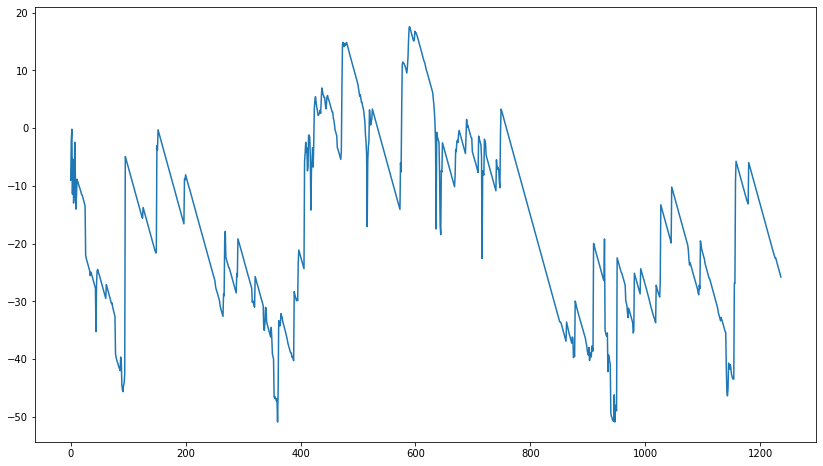

0.0
0.0


In [12]:
target_diff = librosa.power_to_db(np.abs(Phi_xx_all-Phi_xx_all_th))
plt.figure(figsize=(14,8))
plt.plot(target_diff[32, :])
plt.show()
# pmesh(librosa.power_to_db(Phi_xx_all_th))
# pmesh(librosa.power_to_db(Phi_xx_all))
# noise_diff = librosa.power_to_db(np.abs(noise_inv_est))-librosa.power_to_db(np.abs(noise_inv_th))
# print(noise_diff.shape)
# # pmesh(noise_diff)
# plt.figure(figsize=(14,8))
# plt.plot(noise_diff[32, 0:])
# plt.show()

# plt.figure(figsize=(14,8))
# plt.plot(librosa.power_to_db(xi_local_th[30,:1200]))
# # plt.plot(np.maximum(xi_local_th[32,:], 1e-6))
# # plt.title('xi local th')
# plt.show()
print(np.min(xi_local_th[30,:]))
print(np.max(xi_local_th[30,:]))

# pmesh(librosa.power_to_db(xi_local_th))



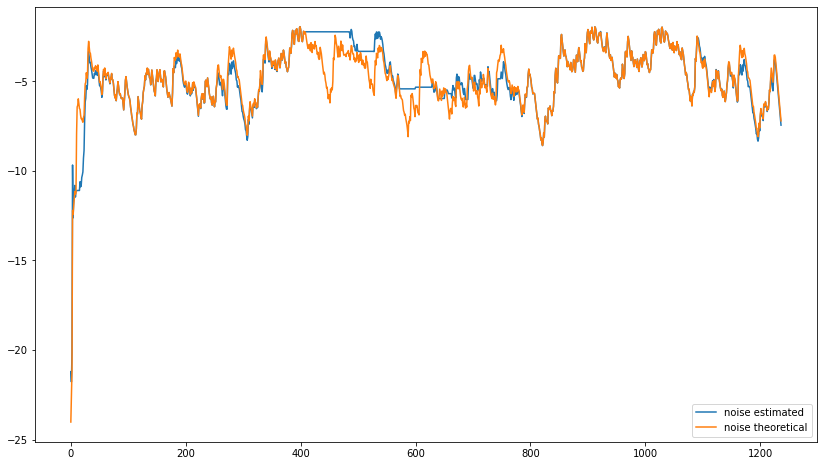

1164
[[0.999999 0.999999 0.999999 0.999999 0.999999 0.999999]
 [0.999999 0.999999 0.999999 0.999999 0.999999 0.999999]
 [0.999999 0.999999 0.999999 0.999999 0.999999 0.999999]]
[[1.00000000e-06 1.00000000e-06 7.11530643e-05 1.13593468e-06
  1.06986349e-06 1.24299332e-06]
 [9.85312098e-07 1.04713016e-06 1.00000000e-06 9.79297843e-01
  9.19292713e-01 2.55215818e-07]
 [1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
  1.00000000e-06 1.00000000e-06]]
diff inv:1300.048567384255


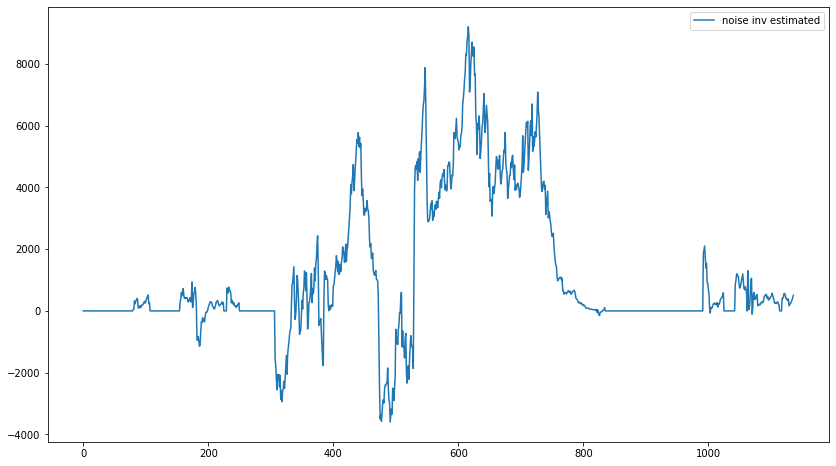

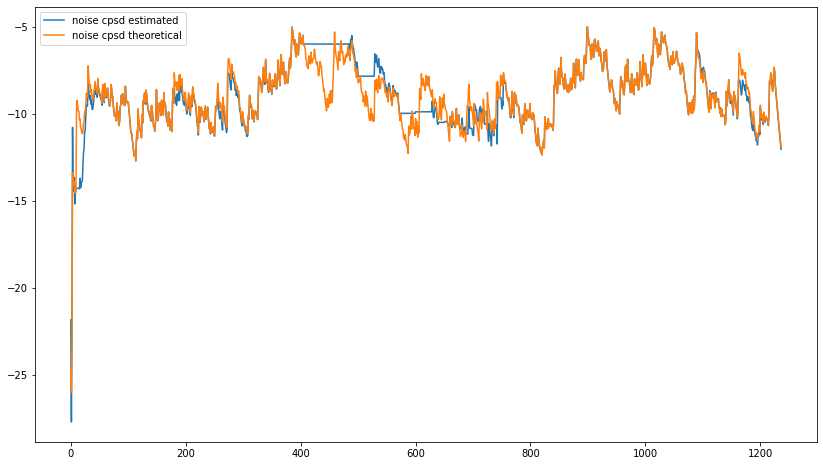

In [13]:
bin_selected = 58

# pmesh(librosa.power_to_db(noise_est))
plt.figure(figsize=(14, 8))
plt.plot((power_to_db(noise_est[bin_selected, :])))
plt.plot((power_to_db(noise_th[bin_selected, :])))

# plt.plot(((gamma_est[bin_selected, :])))
# plt.plot(((gamma_th[bin_selected, :])))

plt.legend(['noise estimated', 'noise theoretical'])
# plt.ylim([10,30])
plt.show()

diff = np.abs(noise_est[bin_selected, :] - noise_th[bin_selected, :])
print(np.argmax(diff[800:])+800)
print(q[bin_selected-1:bin_selected+2,1160:1166])
print(p[bin_selected-1:bin_selected+2,1160:1166])


# print(np.max(noise_inv_est))
# print(np.min(noise_inv_est))
plt.figure(figsize=(14, 8))
# plt.plot(((noise_inv_est[bin_selected, 100:])))
# plt.plot(((noise_inv_th[bin_selected, 100:])))
diff = noise_inv_th[bin_selected, :] - noise_inv_est[bin_selected, :]
print('diff inv:{}'.format(diff[1163]))
plt.plot(((noise_inv_th[bin_selected, 100:] - noise_inv_est[bin_selected, 100:])))
plt.legend(['noise inv estimated', 'noise inv theoretical', 'diff'])
# plt.ylim([-20,])
plt.plot()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot((power_to_db(noise_c_est[bin_selected, :])))
plt.plot((power_to_db(noise_c_th[bin_selected, :])))
plt.legend(['noise cpsd estimated', 'noise cpsd theoretical'])
# plt.ylim([10,30])
plt.plot()
plt.show()

In [14]:
# plt.figure(figsize=(14, 8))
# size = q.shape
# Y = np.arange(0, size[0], 1)
# X = np.arange(0, size[1], 1)
# X, Y = np.meshgrid(X, Y)

# im = plt.pcolormesh(X, Y, q, shading='auto')

# plt.colorbar(im)
# plt.show()
# plt.savefig('q1.png')

0.0
26.63721893759734


/tmp/ipykernel_5547/689218945.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig1)


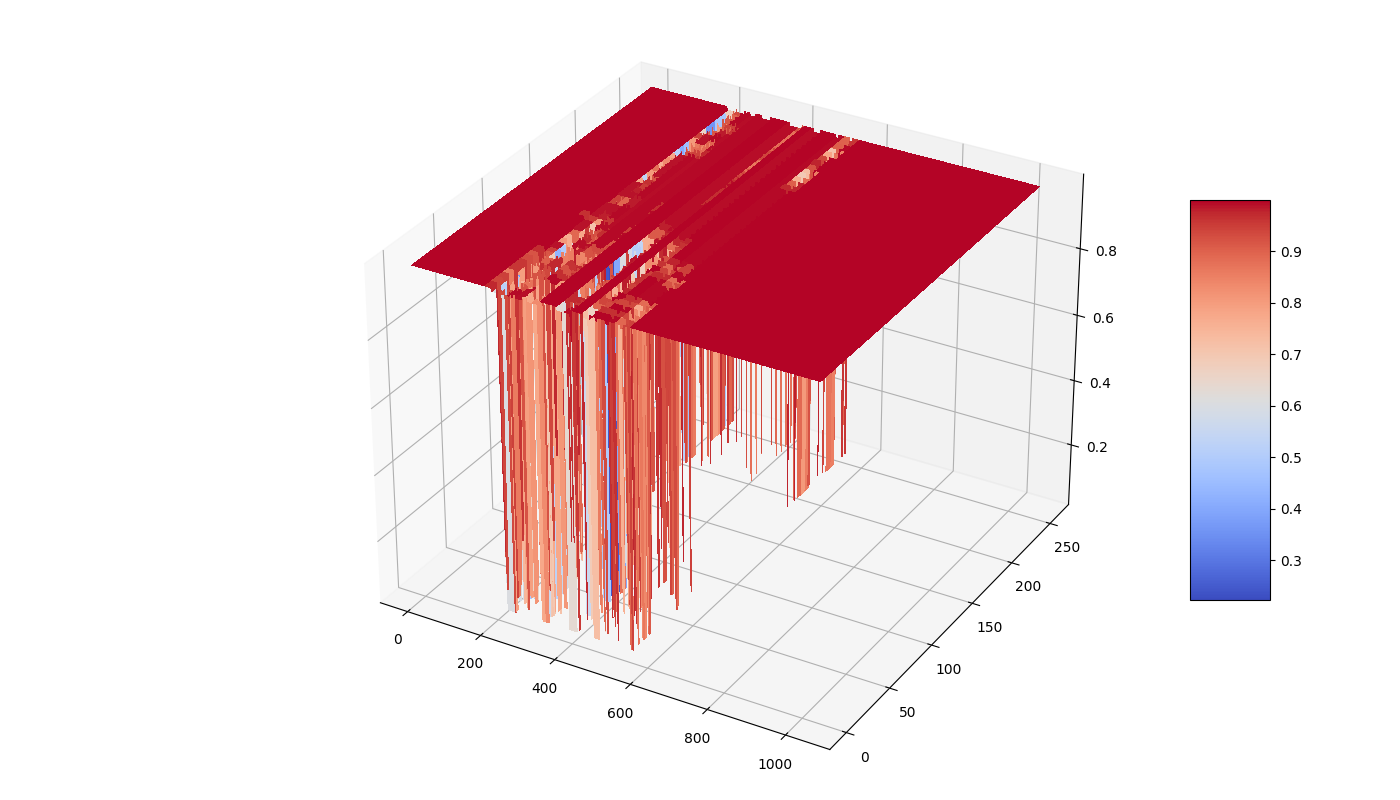

In [15]:
print(xi_local_th[32,250])
print(np.mean(np.abs(D[30,:500, 0])**2)) #[half_bin, M]
# print((1-q[30,:]**6)*2)
plt.figure(figsize=(14, 8))
# plt.plot((1-q[30,:]**6)*2)
# plt.plot(abs(D[30, :, 0])**2)
plt.plot(q[32,800:])
# pmesh((1-q**6)*2)
# pmesh(q)
# pmesh(p)


from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook
%matplotlib ipympl
array2D=q[:, 200:]
size = array2D.shape
Y = np.arange(0, size[0], 1)

X = np.arange(0, size[1], 1)
X, Y = np.meshgrid(X, Y)
fig1 = plt.figure(figsize=(14, 8))
ax = Axes3D(fig1)
surf = ax.plot_surface(X, Y, array2D, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig1.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



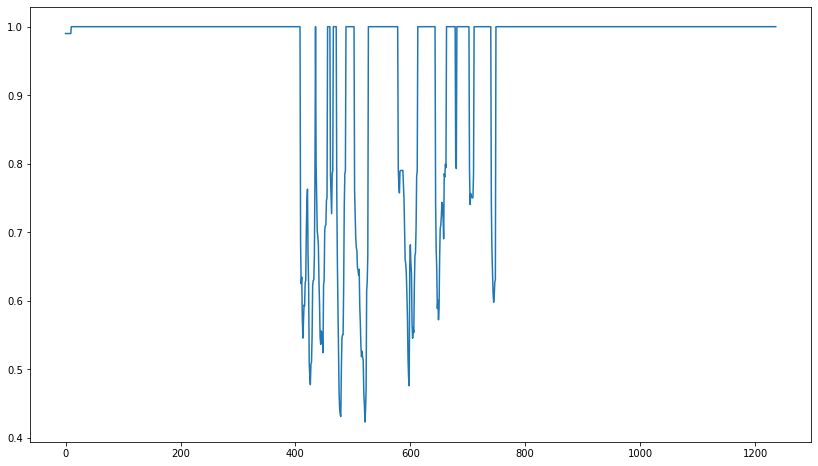

In [16]:
%matplotlib inline
plt.figure(figsize=(14,8))
plt.plot(np.mean(q[8:32, :], axis=0))
plt.show()

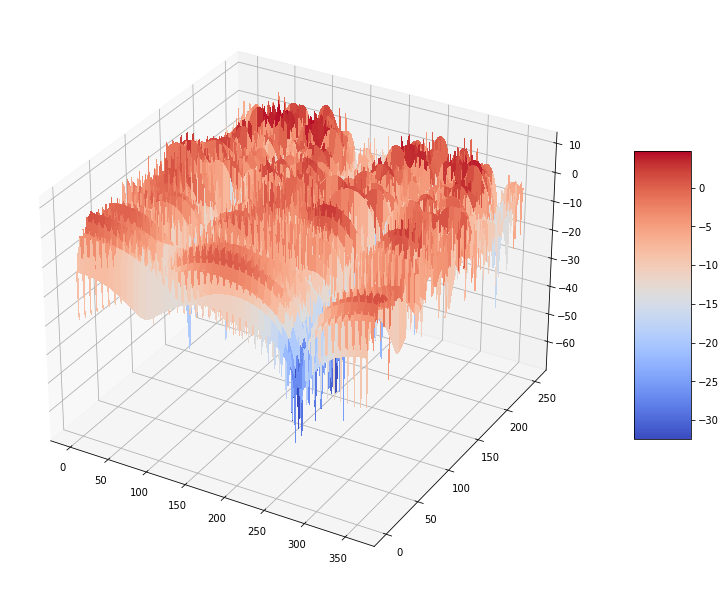

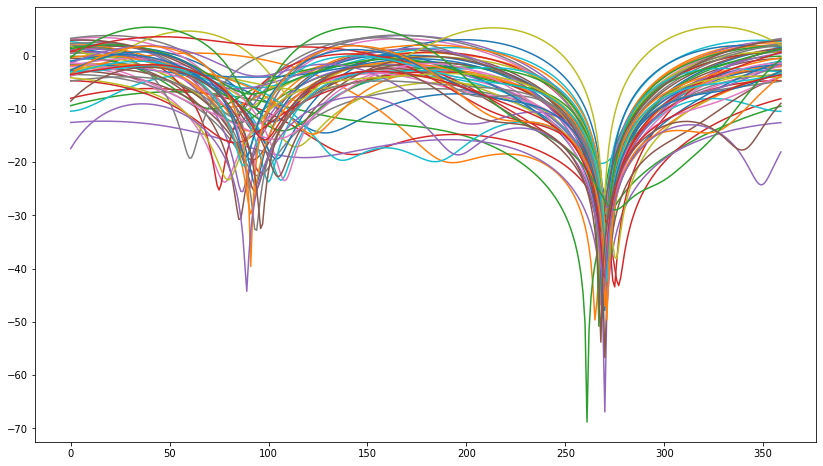

In [17]:
%matplotlib inline
beamformer_obj = beamformer(mic=mic_array, frame_len=512)
beamout = beamformer_obj.compute_beampattern(mic_array, weights=w_n.T)
mesh(beamout[:, 2:-2].T)

plt.figure(figsize=(14, 8))
plt.plot(beamout[:, 8:64])
plt.show()


In [18]:
print(np.min(xi[32,:]**2))

1e-12


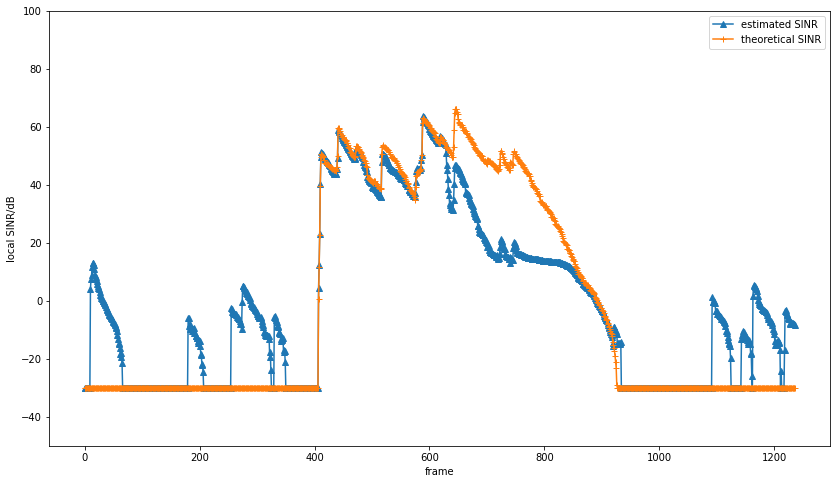

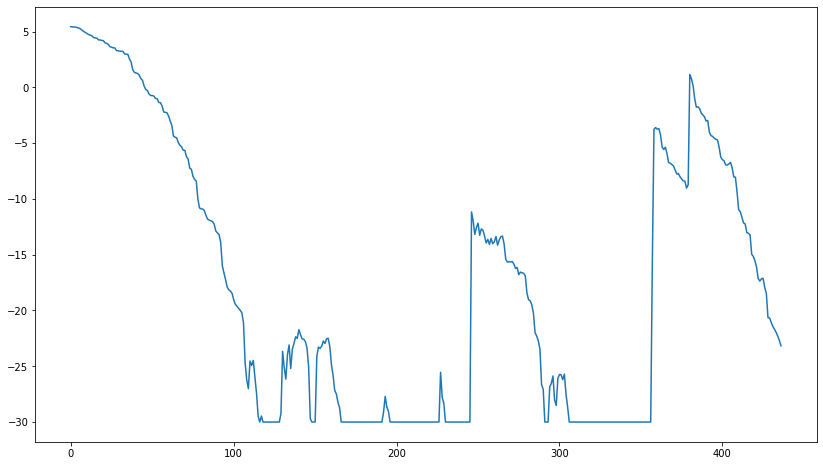

In [19]:
plt.figure(figsize=(14, 8))
# plt.plot(librosa.power_to_db(np.minimum(xi[32, 800:], 100)))
plt.plot(power_to_db(xi[bin_selected,:]), marker="^")
plt.plot(power_to_db(xi_th[bin_selected,:]), marker="+")
# plt.plot(librosa.power_to_db(np.abs(xi_th[32,:]-xi[32,:])), marker="*")

# plt.plot((xi[32,:]), marker="^")
# plt.plot((xi_th[32,:]), marker="+")

plt.xlabel('frame')
plt.ylabel('local SINR/dB')
plt.ylim([-50,100])
plt.legend(['estimated SINR', 'theoretical SINR', 'diff'])
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(power_to_db(xi[32, 800:]))
plt.show()

In [20]:
print(np.min(xi_local_th))
print(np.max(xi_local_th))

0.0
0.0


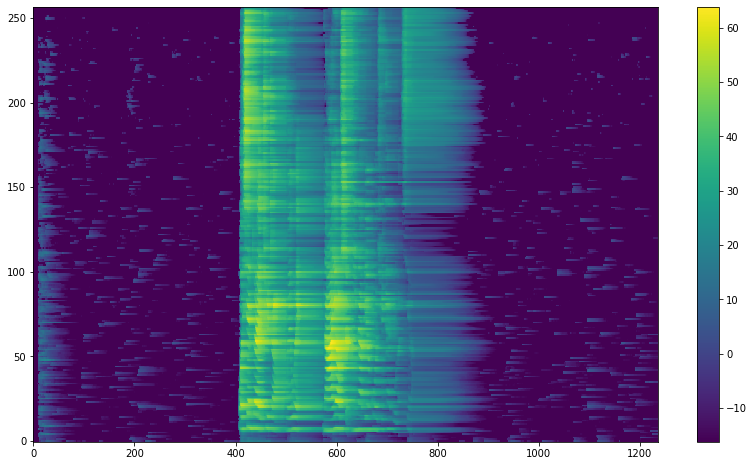

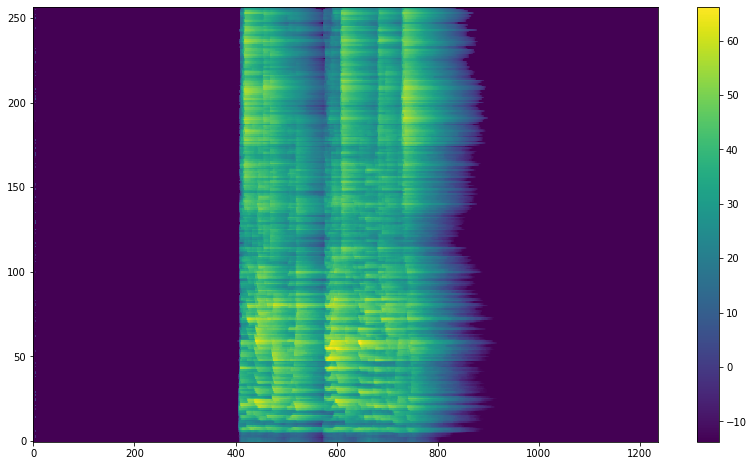

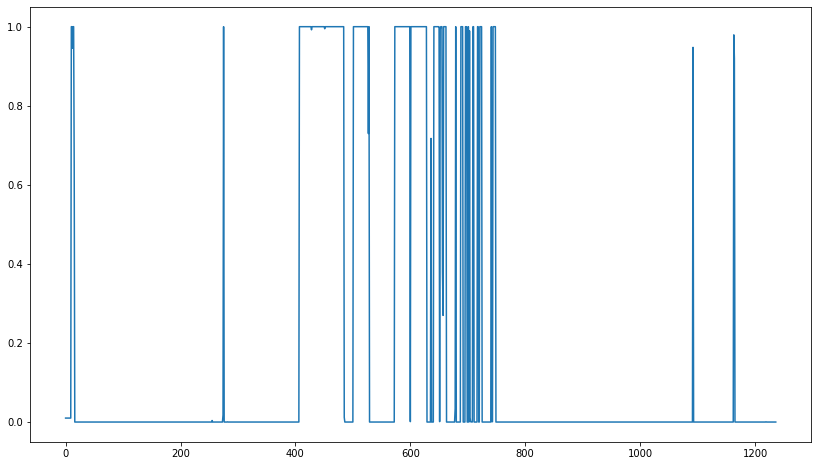

1163


In [21]:
# pmesh(p)
pmesh(librosa.power_to_db(xi))
pmesh(librosa.power_to_db(xi_th))
# pmesh(librosa.power_to_db(xi_local_th))

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook
# %matplotlib ipympl
# array2D=p[:, 200:]
# size = array2D.shape
# Y = np.arange(0, size[0], 1)

# X = np.arange(0, size[1], 1)
# X, Y = np.meshgrid(X, Y)
# fig1 = plt.figure(figsize=(14, 8))
# ax = Axes3D(fig1)
# surf = ax.plot_surface(X, Y, array2D, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# fig1.colorbar(surf, shrink=0.5, aspect=5)

# plt.figure(figsize=(14, 8))
# array2D=p[:, 200:]
# size = array2D.shape
# Y = np.arange(0, size[0], 1)
# X = np.arange(0, size[1], 1)
# X, Y = np.meshgrid(X, Y)

# im = plt.pcolormesh(X, Y, array2D, shading='auto')
# plt.colorbar(im)
# plt.show()
plt.figure(figsize=(14,8))
plt.plot(p[58, :])
plt.show()

print(np.argmax(p[58, 800:])+800)

In [22]:
nsy = array_data[0, :]
ref = signal
# enh = audioread("/home/wangwei/work/DistantSpeech/samples/noise/office1.wav")
# enh = audioread("/home/wangwei/work/DistantSpeech/example/out2.wav")
# enh = audioread("/home/wangwei/work/nn-gev-master/nn_gev2.wav")
# enh = enh[512:]
enh = yout[256:]
nsy = nsy[: len(enh)]
ref = ref[: len(enh)]

offset = 20480 # skip unconverge segment
enh = enh[offset:]
nsy = nsy[offset:]
ref = ref[offset:]

summary = {
    'ref_pesq_wb': pesq(sr, ref, nsy, 'wb'),
    'enh_pesq_wb': pesq(sr, ref, enh, 'wb'),
    'ref_pesq_nb': pesq(sr, ref, nsy, 'nb'),
    'enh_pesq_nb': pesq(sr, ref, enh, 'nb'),
    'ref_stoi': stoi(ref, nsy, sr, extended=False),
    'enh_stoi': stoi(ref, enh, sr, extended=False),
    'ref_estoi': stoi(ref, nsy, sr, extended=True),
    'enh_estoi': stoi(ref, enh, sr, extended=True),
}
for key in summary.keys():
    print('{}:{}'.format(key, summary[key]))

ref_pesq_wb:1.0601650476455688
enh_pesq_wb:2.2621359825134277
ref_pesq_nb:1.2685959339141846
enh_pesq_nb:3.0203328132629395
ref_stoi:0.77820273234558
enh_stoi:0.8793740983508515
ref_estoi:0.5924729061503422
enh_estoi:0.8290324845477776


In [23]:
print(yout.shape)
print(signal.shape)

(316672,)
(316761,)


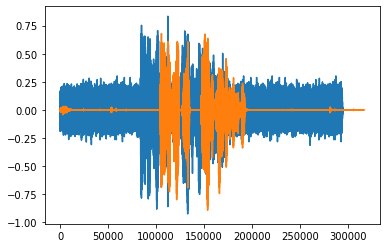

In [24]:
plt.figure()
plt.plot(nsy)
plt.plot(yout[:-1])
plt.show()